In [12]:
%pylab notebook
import sys
import numpy
import matplotlib
try:
    import TimeTagger
except:
    print ("Time Tagger lib is not in the search path.")
    pyversion = sys.version_info
    from winreg import ConnectRegistry, OpenKey, HKEY_LOCAL_MACHINE, QueryValueEx
    registry_path = "SOFTWARE\\Python\\PythonCore\\" + str(pyversion.major) + "." + str(pyversion.minor) + "\\PythonPath\\Time Tagger"
    reg = ConnectRegistry(None, HKEY_LOCAL_MACHINE)
    key = OpenKey(reg, registry_path) 
    module_path = QueryValueEx(key,'')[0]
    print ("adding " + module_path)
    sys.path.append(module_path)
    
from TimeTagger import createTimeTagger, Combiner, Coincidence, Counter, Countrate, Correlation, TimeDifferences, TimeTagStream, Scope, Event, CHANNEL_UNUSED, UNKNOWN, LOW, HIGH

from time import sleep, time
from pylab import *

Populating the interactive namespace from numpy and matplotlib


c:\users\nicho\appdata\local\programs\python\python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'fft', 'power', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


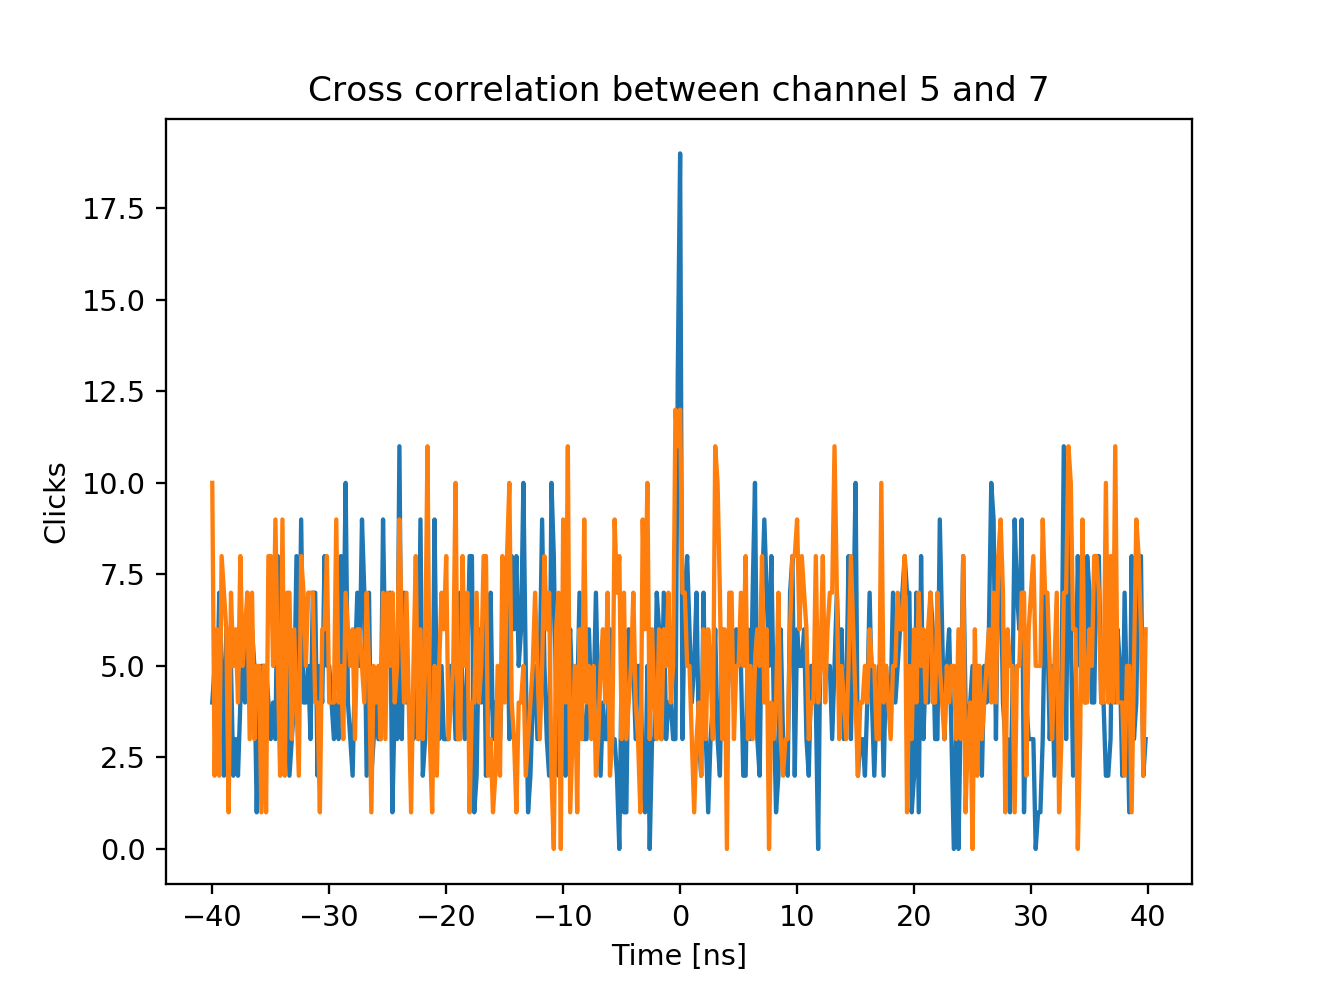

Text(0.5, 1.0, 'Cross correlation between channel 5 and 7')

In [135]:
# create a timetagger instance
tagger = createTimeTagger()
tagger.reset()


# Set the trigger level and deadtime for each channel
[tagger.setTriggerLevel(i, 0.5) for i in range(8)]
[tagger.setDeadtime(i, 6000) for i in range(8)]

coincidenceWindow = 400 # coicidence window in ps

inttime = 20 # integration time in s

# apply the built-in test signal (~0.8 to 0.9 MHz) to channels 1 and 2
#tagger.setTestSignal([1,2,3,4,5,6,7,8], True)
#sleep(.5)

# Delay channels to be coincident, using the web GUI to find the delay value
tagger.setInputDelay(5,-16200)
tagger.setInputDelay(6,-20150)

binwidth_input = 200
binnumber = 400


# cross correlation between channels 1 and 2
# binwidth=1000 ps, n_bins=3000, thus we sample 3000 ns
ion()

corr = Correlation(tagger, channel_1=6, channel_2=7, binwidth=binwidth_input, n_bins=binnumber)
corr1 = Correlation(tagger, channel_1=5, channel_2=7, binwidth=binwidth_input, n_bins=binnumber)


# Set up your three channels for the g2
S1 = Coincidence(tagger, [7,5], coincidenceWindow)
S2 = Coincidence(tagger, [7,6], coincidenceWindow)
C1 = Coincidence(tagger, [S1.getChannel(),S2.getChannel()], coincidenceWindow)
#C1 = Coincidence(tagger, [5,6], coincidenceWindow)

counters = Countrate(tagger, [7, S1.getChannel(), S2.getChannel(), C1.getChannel()])
counters.start()

tagger.sync()
tstart = time.time()    # for profiling


sleep(1)
fig, ax = subplots(1, 1)
corr_plot, = plot(corr.getIndex()/1e3, corr.getData())
xlabel('Time [ns]')
ylabel('Clicks')
title('Cross correlation between channel 6 and 7')

corr_plot1, = plot(corr1.getIndex()/1e3, corr1.getData())
xlabel('Time [ns]')
ylabel('Clicks')
title('Cross correlation between channel 5 and 7')



In [58]:
for i in range(50):
    corr_plot.set_ydata(corr.getData())
    fig.canvas.draw()
    ylim(0, 1.3*max(corr.getData()))

    corr_plot1.set_ydata(corr1.getData())
    fig.canvas.draw()
    
    time.sleep(.05)

In [136]:

sleep(inttime)
counters.stop()
countersdata = counters.getData()
print(countersdata)

#g2 is heralded coincidences times heralds divided by heralded singles times heralded singles

g2 = countersdata[3]*countersdata[0]/(countersdata[1]*countersdata[2])

print(g2)

[2.18270678e+05 3.55723569e+01 3.08053912e+01 0.00000000e+00]
0.0
